# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Dumas, Danielle Louis C.


_Student No._: 2021-09675


_Section_: THU-HX3

### Submission Information

_Date and Time Submitted (most recent upload)_: October 25, 2023 / 11:50 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** DANIELLE LOUIS C. DUMAS

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [ ]:
def f(x):
  return 2*(x**4) + 3*(x**2) + 4*x + 5

N = 10
a = 0.0
b = 5.0

print("FOR TRAPEZOIDAL RULE: ")
for j in range(1,4):
  N=10**j #this loops for values N=10, N=10^2=100, N=10^3=1000
  h=(b-a)/N
  s=0.5*f(a) + 0.5*f(b)
  for k in range (1,N):  #since the summation runs from 1 to N-1
    s += f(a+k*h)
  print("For N=" + str(N))
  print(h*s)
  print("Percentage Error: " + str((abs(1450 - (h*s))/1450)))


FOR TRAPEZOIDAL RULE: 
For N=10
1471.4375
Percentage Error: 0.01478448275862069
For N=100
1450.2145812500003
Percentage Error: 0.00014798706896569988
For N=1000
1450.0021458331234
Percentage Error: 1.4798849127240327e-06


In [ ]:
def f(x):
  return 2*(x**4) + 3*(x**2) + 4*x + 5

N = 10
a = 0.0
b = 5.0

print("FOR SIMPSON'S RULE: ")

for j in range(1,4):
  N=10**j #this loops for values N=10, N=10^2=100, N=10^3=1000
  h=(b-a)/N
  s=f(a) + f(b)
  for k in range(1,N):
    if k%2 == 0:  #this if-else function separates the even k from the odd k
      s += 2*f(a+k*h) #even part
    else:
      s += 4*f(a+k*h) #odd part
  print("For N=" + str(N))
  print((h/3)*s)
  print("Percentage Error: " + str((abs(1450 - ((h/3)*s))/1450)))


print("The percentage errors taken from the Simpson's Rule is relatively smaller than the trapezoidal percentage errors. This tells us that when dealing with this function, the Simpson's RUle is much more accurate.")

FOR SIMPSON'S RULE: 
For N=10
1450.0833333333333
Percentage Error: 5.7471264367763824e-05
For N=100
1450.0000083333334
Percentage Error: 5.747126500676226e-09
For N=1000
1450.0000000008333
Percentage Error: 5.747065658616866e-13
The percentage errors taken from the Simpson's Rule is relatively smaller than the trapezoidal percentage errors. This tells us that when dealing with this function, the Simpson's RUle is much more accurate.


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [3]:
#taken from Appendix E of Computational Physics
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

  #the initial approximation to roots of Legendre polynomial
  a=linspace(3,4*N-1,N)/(4*N+2)
  x=cos(pi*a+1/(8*N*N*tan(a)))

  #Finding roots
  epsilon = 1e-15
  delta = 1.0
  while delta > epsilon:
    p0 = ones(N,float)
    p1 = copy(x)
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx
    delta = max(abs(dx))

  #Calculating weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

  return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [36]:
def f(x):
  return 2*(x**4) + 3*(x**2) + 4*x + 5

N = 3
a = 0.0
b = 5.0

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

#Perform the integration (can also be done by defining gquad, like in problem 3)
s = 0.0
for k in range(N):
  s += wp[k]*f(xp[k]) #value of the integral using gaussian quadrature

print(s)

1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

In [28]:
from numpy import ones,copy,cos,tan,pi,linspace, sqrt

def gaussxw(N):

  #the initial approximation to roots of Legendre polynomial
  a=linspace(3,4*N-1,N)/(4*N+2)
  x=cos(pi*a+1/(8*N*N*tan(a)))

  #Finding roots using Newton's method
  epsilon = 1e-15
  delta = 1.0
  while delta > epsilon:
    p0 = ones(N,float)
    p1 = copy(x)
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx
    delta = max(abs(dx))

  #Calculating weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

  return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

#Performing the integration, this performs the integration using the function T(x)
def gquad(f,b):
  xp,wp = gaussxwab(N,a,b)
  s = 0.0
  for k in range(N):
    s+=wp[k]*f(xp[k]) #as given by the value of an integral using gaussian quadrature
  return s

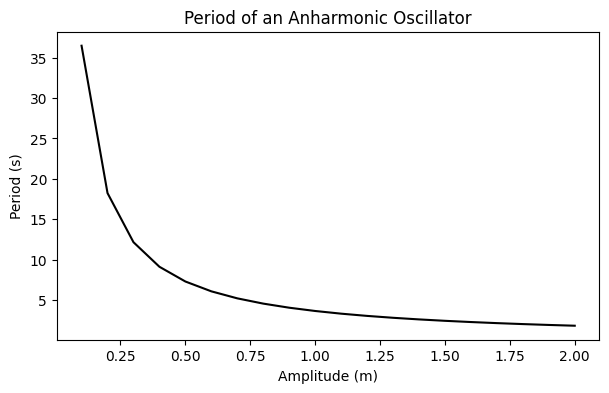

As the amplitude increases, we can notice that the period is decreasing which means that the oscillator increases in speed. We know that the restoring force is directly proportional to the amplitude/displacement, a stronger force corresponds to a faster velocity.


In [42]:
import matplotlib.pyplot as plt
import math
m = 1 #kg
N = 20 #points
a = 0
amplitudes = linspace(0.1,2,N) #we use 0.1 in order to avoid an error but also being as close to a=0 as possible

def dTdt(x):  #we just define the given function for T, since the RHS is an integral, then we define the LHS to be an integral as well, thus dTdt
  return sqrt(8*m)/sqrt(amp**4-x**4)

S = list() #since we are looking for the graph, then we plot multiple points, thus we use a list to compile
for amp in amplitudes:
  S.append(gquad(dTdt,amp)) #since we defined gquad with arguments f for the function and b as the upper bounds for the integral

plt.figure(figsize=(7,4)) #preferred width and height
plt.title("Period of an Anharmonic Oscillator")
plt.xlabel("Amplitude (m)")
plt.ylabel("Period (s)")
plt.plot(amplitudes,S,'k')
plt.show()

print("As the amplitude increases, we can notice that the period is decreasing which means that the oscillator increases in speed. We know that the restoring force is directly proportional to the amplitude/displacement, a stronger force corresponds to a faster velocity.")